# Index
 - Loading dataset
 - Annotomy of MNIST dataset
 - Data normalization
 - Creating model
 - Compile model
 - Train or Fit model
 - Evaluating Model
 - Visualizing the training process
 - Save and load model
 - Test a single image

# Loading  dataset
MNIST dataset, which contains 70000 28x28 grayscale images with 10 different classes. Keras splits it in a training set with 60000 instances and a testing set with 10000 instances.

In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Anatomy of MNIST dataset

In [0]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape :', x_test.shape)
print('y_test shpae :', y_test.shape)

In [0]:
# plot some data
from matplotlib import pyplot as plt

image = x_train[0] 
label = y_train[0]
plt.imshow(image, cmap='gray')
plt.xlabel('label = {}'.format(label))
plt.show()

In [0]:
# print(x_train[0])

In [0]:
ROW = 3
COLUMN = 4
for i in range(ROW * COLUMN):
    image = x_train[i]
    label = y_train[i]
    plt.subplot(ROW, COLUMN, i+1)
    plt.imshow(image, cmap='gray')
    plt.title('label = {}'.format(label))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
# plt.savefig('images/mnist_plot.png')
plt.show()

# Data normalization

In [0]:
# do some preprocessing on data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [0]:
print('after preprocess new shape of data:')
print('-' * 35)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape :', x_test.shape)
print('y_test shpae :', y_test.shape)

In [0]:
# print(x_train[0])

# Creating model

# Creating a model with the sequential API
The easiest way of creating a model in Keras is by using the `sequential API`, which lets you stack one layer after the other. The problem with the sequential API is that `it doesn’t allow models to have multiple inputs or outputs`, which are needed for some problems.

Nevertheless, the sequential API is a perfect choice for most problems.

To create a convolutional neural network we only need to create a Sequential object and use the add function to add layers.

In [0]:
import os 
os.environ['TF_CPP_LOG_LEVEL'] = "1" # ignore tensorflwo worning

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

W0707 10:49:44.898265 140411859654528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 10:49:44.932361 140411859654528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 10:49:45.039416 140411859654528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0707 10:49:45.076821 140411859654528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0707 10:49:45.081702 140411859654528 deprecation_wrapp

The sequential API also supports another syntax where the layers are passed to the constructor directly.

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]),
    Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(rate=0.5),
    Dense(10, activation='softmax')
])


# Creating a model with the Functional API
Alternatively, the functional API allows you to create the same models but offers you more flexibility at the cost of simplicity and readability.

It `can be used with multiple input and output layers as well as shared layers`, which enables you to build really complex network structures.

When using the `functional API` we always need to pass the previous layer to the current layer. It also requires the use of an input layer.

In [0]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input

inputs = Input(shape=x_train.shape[1:])

x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

# Compile a model
Before we can start training our model we need to configure the learning process. For this, we need to specify an optimizer, a loss function and optionally some metrics like accuracy.

The `loss function` is a measure on how good our model is at achieving the given objective.

An `optimizer` is used to minimize the loss(objective) function by updating the weights using the gradients

In [0]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

W0707 10:49:58.410506 140411859654528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0707 10:49:58.435883 140411859654528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
model.summary()

# Train or Fit model

In [0]:
epochs = 5
history = model.fit(x=x_train, y=y_train, epochs=5)

W0707 10:50:01.175103 140411859654528 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
60000/60000 [==============================] - 16s 274us/step - loss: 0.2008 - acc: 0.9359
Epoch 2/5
60000/60000 [==============================] - 10s 162us/step - loss: 0.0702 - acc: 0.9793
Epoch 3/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.0571 - acc: 0.9836
Epoch 4/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.0486 - acc: 0.9857
Epoch 5/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.0418 - acc: 0.9880


# Evaluating Mode
Finally, you may evaluate the trained model with x_test and y_test using one line of code:

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 70us/step


[0.031649693254509476, 0.9913]

In [0]:
# You can see we have got 99% accuracy on test data

# Visualizing the training process
We can visualize our training and testing accuracy and loss for each epoch so we can get intuition about the performance of our model. The accuracy and loss over epochs are saved in the history variable we got whilst training and we will use Matplotlib to visualize this data

val [0.031649693254509476, 0.9913]


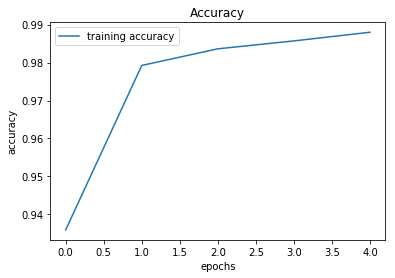

In [0]:
plt.plot(history.history['acc'], label='training accuracy')
# plt.plot(history.history['val_acc'], label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

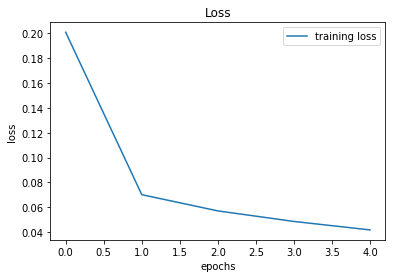

In [0]:
plt.plot(history.history['loss'], label='training loss')
# plt.plot(history.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# Save and load model

In [0]:
import os

model_name = 'mnist_clf.h5'
model.save(model_name)
print('model saved to', os.getcwd())
!ls -ltr


model saved to /content
total 5556
drwxr-xr-x 1 root root    4096 Jun 18 16:14 sample_data
-rw-r--r-- 1 root root 2841808 Jul  7 10:58 mnist_cls.h5
-rw-r--r-- 1 root root 2841808 Jul  7 11:12 mnist_clf.h5


In [0]:
from keras.models import load_model

loaded_model = load_model(model_name)
# model.summary()

# Test a single image

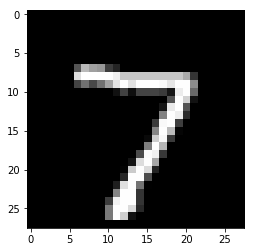

In [0]:
image_index = 0 # 4444
test_image = x_test[image_index].reshape(28, 28)
plt.imshow(test_image, cmap='gray')


In [0]:
test_image = test_image.reshape(1, 28, 28, 1) # make image batch

pred = loaded_model.predict(test_image)       # prediction

print('pred lenght:', len(pred[0]))
best_prediction = pred.argmax()
print('best_prediction', best_prediction)

pred lenght: 10
best_prediction 7


# Hard Sampe for recognition

In [0]:
import numpy as np

def show_failures(predictions, trueclass=None, predictedclass=None, maxtoshow=5):
    rounded = np.argmax(predictions, axis=1)
    errors = rounded!=y_test
    print('Showing max', maxtoshow, 'first failures. '
          'The predicted class is shown first and the correct class in parenthesis.')
    ii = 0
    plt.figure(figsize=(maxtoshow, 1))
    for i in range(x_test.shape[0]):
        if ii>=maxtoshow:
            break
        if errors[i]:
            if trueclass is not None and y_test[i] != trueclass:
                continue
            if predictedclass is not None and predictions[i] != predictedclass:
                continue
            plt.subplot(1, maxtoshow, ii+1)
            plt.axis('off')
            plt.imshow(x_test[i,:,:,0], cmap="gray")
            plt.title("%d (%d)" % (rounded[i], y_test[i]))
            ii = ii + 1

Showing max 5 first failures. The predicted class is shown first and the correct class in parenthesis.


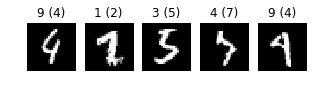

In [0]:
predictions = loaded_model.predict(x_test)

show_failures(predictions)